# Уменьшение количества цветов изображения

#### Вы научитесь:

- использовать алгоритм *K-Means*
- работать с задачами обучения без учителя
- работать с изображениям в *Python*

#### Введение

Самый распространенный тип задач машинного обучения — это задачи обучения с учителем. В них имеется обучающая выборка, для каждого объекта которой есть ответ, и нужно научиться предсказывать эти ответы для новых объектов. В такой постановке можно строго определить критерии качества.


Если же имеются лишь объекты, а ответов для них нет, то все равно можно пытаться найти в данных некую структуру. Задачи, которые ищут закономерности в неразмеченных выборках, называют задачами обучения без учителя. Типичный пример такой задачи — кластеризация, где требуется найти группы похожих объектов.


Кластеризация может использоваться для самых разных целей. В этом задании мы попробуем группировать схожие пиксели на изображении. Такой подход позволяет переходить к суперпиксельному представлению изображений, которое является более компактным и лучше подходит для решения ряда задач компьютерного зрения.

#### Реализация в *sklearn*

Алгоритм *KMeans* реализован в классе `sklearn.cluster.KMeans`. Так как это один из примеров *unsupervised-*задачи, для обучения достаточно передать только матрицу объектов.


В качестве метрики будем использовать [PSNR](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio) — адаптация метрики *MSE* для задачи нахождениях сходства изображений.


Для работы с изображениями мы рекомендуем воспользоваться пакетом [scikit-image](http://scikit-image.org/). Чтобы загрузить изображение, необходимо выполнить следующую команду:

```python
from skimage.io import imread
image = imread('parrots_4.jpg')
```

После этих действий переменная *image* будет содержать изображение в виде *numpy*-массива размера `n * m * 3`, где `n` и `m` соответствуют размерам изображения, а 3 соответствует формату представления *RGB*.


Если вы хотите вывести изображение на экран, необходимо, чтобы у вас была установлена библиотека `matplotlib`. С помощью нее это делается следующим образом:

```python
import pylab
pylab.imshow(image)
```

Если вы работаете в `ipython-notebook`'е, то вам необходимо перед выполнением кода выше исполнить в любой ячейке инструкцию:

```python
%matplotlib inline
```

Она позволяет выводить изображения прямо в `ipython-notebook`.

In [1]:
from skimage.io import imread, imsave
from skimage import img_as_float
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import pylab
from math import log10

%matplotlib inline

# 1
Загрузите картинку `parrots.jpg`. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией [img_as_float](http://scikit-image.org/docs/dev/api/skimage.html) из модуля `skimage`. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

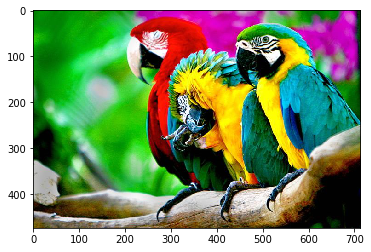

In [3]:
img = imread('parrots.jpg')

pylab.imshow(img)

img = img_as_float(img)
w, h = img.shape[:-1]
fimg = img.reshape(w*h, -1)

In [5]:
X = pd.DataFrame(data=fimg, columns=('R', 'G', 'B'))
X.head()

,R,G,B
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


In [9]:
def psnr(i1, i2):
    mse = ((i1 - i2) ** 2).mean()
    return 10 * log10(1. / mse)

In [14]:
for n in range(1, 21):
    # 2. Создайте матрицу объекты-признаки: характеризуйте каждый пик-
    # сель тремя координатами - значениями интенсивности в простран-
    # стве RGB.
    X = pd.DataFrame(data=fimg, columns=('R', 'G', 'B'))

    # 3. Запустите алгоритм K-Means с параметрами init=’k-means++’ и
    # random_state=241. После выделения кластеров все пиксели, отне-
    # сенные в один кластер, попробуйте заполнить двумя способами:
    # медианным и средним цветом по кластеру.
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=241, n_jobs=-1)
    X['cluster'] = kmeans.fit_predict(X)
    means = X.groupby('cluster').mean().values
    medians = X.groupby('cluster').median().values
    set_new_colors = lambda a: np.reshape(list(map(lambda c: a[c], X['cluster'])), (w, h, -1))
    mean_img = set_new_colors(means)
    median_img = set_new_colors(medians)
    imsave('mean_%d' % n + '.jpg', mean_img)
    imsave('median_%d' % n + '.jpg', median_img)

    # 4. Измерьте качество получившейся сегментации с помощью метрики PSNR.
    mean_psnr, median_psnr = psnr(img, mean_img), psnr(img, median_img)
    print(n, mean_psnr, median_psnr)

    # 5. Найдите минимальное количество кластеров, при котором значе-
    # ние PSNR выше 20 (можно рассмотреть не более 20 кластеров, но
    # не забудьте рассмотреть оба способа заполнения пикселей одного
    # кластера). Это число и будет ответом в данной задаче.
    if mean_psnr > 20 or median_psnr > 20:
        with open('submission.txt', 'w') as f: f.write(str(n))
        break


1 9.818835544771293 9.427840460507397


/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: mean_1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: median_1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


2 12.08016916040257 11.652544385692007
3 13.153505870294548 12.786782636668407
4 14.367827815135406 14.004899663229601
5 15.527189418511826 15.17524889312049
6 16.54399221234048 16.05119201536348
7 17.64099386447709 17.336539296363906
8 18.4368218871401 18.13992430984643
9 19.11266696752748 18.813060694784284
10 19.640743436783097 19.41741010644019
11 20.12756000976076 19.847708761293337
